In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from mpl_toolkits.mplot3d import axes3d

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
N_HANDS_TO_PLAY=7*10**6
#--
# implement hands of black jack
#--
policy = np.ones((10,10,2))
q_reward = np.zeros((10,10,2,2))
q_time = np.zeros((10,10,2,2))
q_avg = np.zeros((10,10,2,2))
for _ in xrange(N_HANDS_TO_PLAY):  
    phv = np.random.randint(12,22)
    cardshowing = np.random.randint(1,14)
    dhv = np.minimum(cardshowing, 10)
    usableAce = np.random.randint(0,2)
    #Exploring Starts
    action = np.random.randint(0,2)
    reward = 0.
    state = [phv, dhv, usableAce]
    stateActionseen = [state + [action]]
    while action:
        cardDrawn = np.random.randint(1,14)
        cardValue = np.minimum(cardDrawn, 10)
        state[0] += cardValue
        if state[0] <= 21:
            action = policy[state[0]-12, state[1]-1, usableAce]
            stateActionseen.append(state + [action])
        else:
            if state[2] == 1:
                state[0] -= 10
                state[2] = 0
                action = policy[state[0]-12, state[1]-1, state[2]]
                stateActionseen.append(state + [action])
            else:
                reward = -1
                break
    usableAceDealer = 0
    if reward == 0:        
        if dhv == 1:
            dhv += 10
            usableAceDealer = 1
        while dhv < 17:
            cardDrawn = np.random.randint(1,14)
            cardValue = np.minimum(cardDrawn, 10)
            if cardValue == 1 and dhv < 11:
                cardValue = 11
                usableAceDealer = 1
            dhv += cardValue
            if usableAceDealer == 1 and dhv >= 22:
                usableAceDealer = 0
                dhv -= 10
        reward = determineReward(state[0], dhv)
    for stateAction in stateActionseen:
        #q_reward[stateAction[0]-12, stateAction[1]-1, stateAction[2], stateAction[3]] += reward
        #q_time[stateAction[0]-12, stateAction[1]-1, stateAction[2], stateAction[3]] += 1.
        stateUnderConsideration = (stateAction[0]-12, stateAction[1]-1, stateAction[2], stateAction[3])
        q_reward[stateUnderConsideration] += reward
        q_time[stateUnderConsideration] += 1.
        q_avg[stateUnderConsideration] = (q_reward[stateUnderConsideration]/
                                          q_time[stateUnderConsideration])
        policy[stateUnderConsideration[:-1]] = np.argmax(
            q_avg[stateAction[0]-12, stateAction[1]-1, stateAction[2], :])
    
        #q_avg[np.where(q_time != 0)] = q_reward[np.where(q_time != 0)]/q_time[np.where(q_time != 0)]
        #policy = np.argmax(q_avg, axis=3)

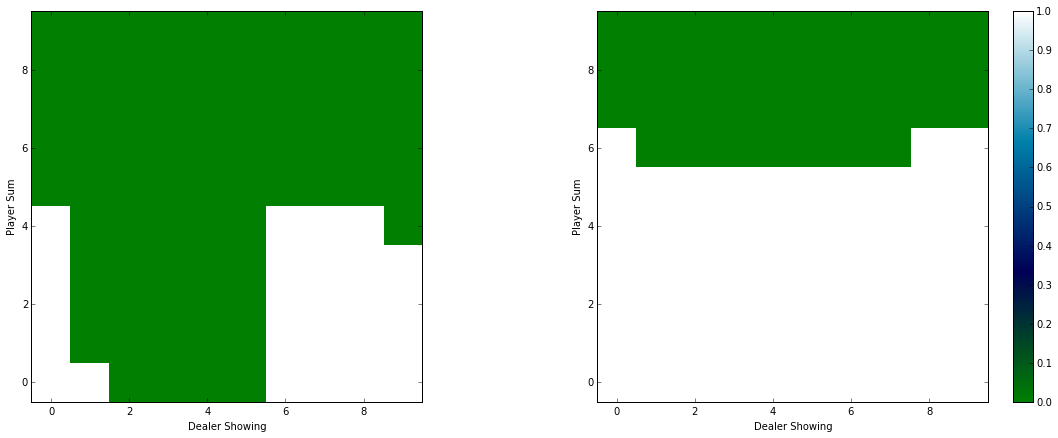

In [12]:
figsize(20,7)
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_aspect('equal')
plt.imshow(policy[:,:,0], interpolation='nearest', cmap=plt.cm.ocean, origin='left')
plt.xlabel('Dealer Showing')
plt.ylabel('Player Sum')
# plt.xticks(range(1,14))
# ax.set_yticklabels(range(12,22))
#plt.colorbar()
 
ax = fig.add_subplot(1,2,2)
ax.set_aspect('equal')
plt.imshow(policy[:,:,1], interpolation='nearest', cmap=plt.cm.ocean, origin='left')
plt.xlabel('Dealer Showing')
plt.ylabel('Player Sum')
# plt.xticks(range(1,14))
# ax.set_yticklabels(range(12,22))
plt.colorbar()
plt.show()  

In [13]:
X

NameError: name 'X' is not defined

In [ ]:
mc_value_fn = np.max(q_avg, axis=3)

print 'No usable ace'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.tile(np.arange(1,11), (10,1))
Y = np.repeat(np.arange(12, 22).reshape(10,1),10, axis=1) 

Z = mc_value_fn[:,:,0]
ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
figsize(20,7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(Z, interpolation='nearest', cmap=plt.cm.ocean, origin='left')
plt.colorbar()
plt.show()  

print 'Usable ace'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.tile(np.arange(1,11), (10,1))
Y = np.repeat(np.arange(12, 22).reshape(10,1),10, axis=1) 

Z = mc_value_fn[:,:,1]
ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
figsize(20,7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(Z, interpolation='nearest', cmap=plt.cm.ocean, origin='left')
plt.colorbar()
plt.show()  
#fn=sprintf('state_value_fn_nua_%d_mesh.eps',N_HANDS_TO_PLAY); saveas( gcf, fn, 'eps2' );

In [ ]:
Y

In [ ]:
print 'No usable ace'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.tile(np.arange(1,14), (10,1))
Y = np.repeat(np.arange(12, 22).reshape(10,1),13, axis=1) 

Z = mc_value_fn[:,:,0]
ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
figsize(20,7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(Z, interpolation='nearest', cmap=plt.cm.ocean, origin='left')
plt.colorbar()
plt.show()  

print 'Usable ace'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.tile(np.arange(1,14), (10,1))
Y = np.repeat(np.arange(12, 22).reshape(10,1),13, axis=1) 

Z = mc_value_fn[:,:,1]
ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
figsize(20,7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(Z, interpolation='nearest', cmap=plt.cm.ocean, origin='left')
plt.colorbar()
plt.show()  
#fn=sprintf('state_value_fn_nua_%d_mesh.eps',N_HANDS_TO_PLAY); saveas( gcf, fn, 'eps2' );

In [ ]:
def determineReward(phv,dhv):
    if phv > 21: # player went bust
        rew = -1.
    elif dhv > 21: # dealer went bust
        rew = +1.
    elif phv == dhv: # a tie
      rew = 0.
    elif phv > dhv: # the larger hand wins
      rew = +1. 
    else:
      rew = -1.
    return rew
